# 1. Data cleaning, preparation and exploration

## 1.1. Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

import scipy.stats as st
from scipy.stats import t

# Avoid scientific notation in float values
pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

# Show all rows and columns in the outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Switch off the warning about setting with copy
pd.set_option('mode.chained_assignment', None)

# Increase width of column
pd.set_option('display.max_colwidth', None)

## 1.2. Import datasets

### a) Twitter variables and sentiment analysis

In [2]:
df_twitter = pd.read_csv("../data/df_monthly_ml_full.csv", parse_dates = [0])
df_twitter[['Date']] = df_twitter[['year_month']]
df_twitter = df_twitter.drop(['year_month'], axis = 1)
df_twitter.head()

,sentiment_BR,total_BR,sentiment_BRG1665,sentiment_BRG1666,sentiment_BRG1667,sentiment_BRG1668,sentiment_BRG1669,sentiment_BRG1670,sentiment_BRG1671,sentiment_BRG1672,sentiment_BRG1673,sentiment_BRG1674,sentiment_BRG1675,sentiment_BRG1676,sentiment_BRG1677,sentiment_BRG1678,sentiment_BRG1679,sentiment_BRG1680,sentiment_BRG1681,sentiment_BRG1682,sentiment_BRG1683,sentiment_BRG1685,sentiment_BRG1686,sentiment_BRG1687,sentiment_BRG1688,sentiment_BRG1689,sentiment_BRG1690,sentiment_BRG1691,total_BRG1665,total_BRG1666,total_BRG1667,total_BRG1668,total_BRG1669,total_BRG1670,total_BRG1671,total_BRG1672,total_BRG1673,total_BRG1674,total_BRG1675,total_BRG1676,total_BRG1677,total_BRG1678,total_BRG1679,total_BRG1680,total_BRG1681,total_BRG1682,total_BRG1683,total_BRG1685,total_BRG1686,total_BRG1687,total_BRG1688,total_BRG1689,total_BRG1690,total_BRG1691,year,month,population_growth_annual_percent,population_density_people_per_sq_km_of_land_area,poverty_headcount_ratio_at_2_15_a_day_2017_ppp_percent_of_population,gni_per_capita_ppp_current_international,income_share_held_by_lowest_20_percent,life_expectancy_at_birth_total_years,fertility_rate_total_births_per_woman,adolescent_fertility_rate_births_per_1_000_women_ages_15_19,births_attended_by_skilled_health_staff_percent_of_total,mortality_rate_under_5_per_1_000_live_births,school_enrollment_primary_percent_gross,school_enrollment_secondary_percent_gross,school_enrollment_primary_and_secondary_gross_gender_parity_index_gpi,annual_freshwater_withdrawals_total_percent_of_internal_resources,urban_population_growth_annual_percent,gdp_growth_annual_percent,gross_capital_formation_percent_of_gdp,mobile_cellular_subscriptions_per_100_people,statistical_capacity_score_overall_average_scale_0_100,people_using_safely_managed_drinking_water_services_percent_of_population,hospital_beds_per_1_000_people,nurses_and_midwives_per_1_000_people,physicians_per_1_000_people,in_reply_to_status_count,in_reply_to_user_count,in_quotation_user_count,in_quotation_status_count,in_retweet_user_count,in_retweet_status_count,entities_count,followers_mean,following_mean,user_statuses_mean,verified_users_count,retweets_count,quotes_count,replies_count,num_retweets_mean,num_quotes_mean,num_replies_mean,Date
0,-0.11,7753,-0.03,-0.01,-0.06,-0.12,-0.09,-0.06,-0.02,-0.15,-0.08,-0.09,0.00,-0.09,-0.11,-0.09,-0.04,-0.14,-0.04,0.00,-0.14,-0.08,0.00,-0.23,-0.13,-0.16,-0.04,-0.27,39,97,49,170,412,280,240,116,161,247,23,127,1981,34,427,256,215,8,29,583,9,22,158,2009,50,11,2013,1,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,548,633,0,0,1356,1356,2869,3989.66,1399.48,22124.98,22,1356,0,548,0.20,0.00,0.01,2013-01-01 00:00:00+00:00
1,-0.14,1099,0.00,-0.14,0.00,-0.07,-0.09,-0.17,-0.03,-0.05,-0.10,0.00,-0.17,-0.12,-0.15,0.20,-0.07,-0.11,-0.11,0.00,-0.40,-0.12,0.00,0.00,-0.24,-0.22,0.00,0.00,7,14,4,29,66,30,36,21,31,45,6,17,230,5,40,53,19,2,5,95,0,3,49,282,7,3,2013,2,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,112,123,0,0,155,155,364,2193.08,1487.72,18782.35,1,155,0,112,0.14,0.01,0.01,2013-02-01 00:00:00+00:00
2,-0.11,930,0.00,0.00,0.00,-0.05,-0.09,-0.07,-0.06,-0.09,0.00,0.00,-0.12,-0.23,-0.11,0.00,-0.06,-0.18,-0.01,0.00,0.00,-0.22,0.00,0.00,-0.04,-0.16,0.00,0.00,1,7,3,20,66,27,36,11,11,28,8,22,195,5,49,34,115,0,0,93,0,2,23,169,4,1,2013,3,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,87,96,0,0,0,0,179,2936.93,879.11,25116.85,3,0,0,87,0.00,0.00,0.01,2013-03-01 00:00:00+00:00
3,-0.13,17898,-0.06,-0.03,-0.07,-0.10,-0.07,-0.06,-0.11,-0.12,-0.08,-0.08,-0.12,-0.11,-0.10,-0.14,-0.06,-0.15,-0.06,0.00,-0.15,-0.23,-0.02,-0.04,-0.16,-0.17,-0.03,-0.05,81,326,116,407,1071,580,431,269,401,532,93,442,3851,74,937,890,535,35,92,2823,44,53,582,3066,145,22,2013,4,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,

In [3]:
df_twitter.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 97 columns):
 #   Column                                                                     Non-Null Count  Dtype              
---  ------                                                                     --------------  -----              
 0   sentiment_BR                                                               84 non-null     float64            
 1   total_BR                                                                   84 non-null     int64              
 2   sentiment_BRG1665                                                          84 non-null     float64            
 3   sentiment_BRG1666                                                          84 non-null     float64            
 4   sentiment_BRG1667                                                          84 non-null     float64            
 5   sentiment_BRG1668                                                          84 no

In [4]:
# Heatmap with correlation coefficients between all variables
#corr_matrix = df_twitter.corr().round(1)
#plt.rcParams.update({'font.size': 10})
#plt.rcParams['figure.figsize']= 20,25
#sns.heatmap(corr_matrix, annot = True)
#plt.xticks(rotation = 45)
#plt.show()

In [5]:
# Line chart of each numerical variable
#columns_numeric = df_twitter.select_dtypes(include = [np.number]).columns
#plt.rcParams["figure.figsize"]=10,5
#for col in columns_numeric:
#    plt.plot(df_twitter['Date'], df_twitter[col])
#    plt.xlabel('Year, month and day')
#    plt.xticks(rotation = 45)
#    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
#    plt.ylabel(col)
#    plt.show()

### b) Vaccine uptake

In [6]:
df_dtp = pd.read_csv("../data/uptake_br_dtp_2013_2019_clean_month.csv",
                    parse_dates = [0])
df_dtp.head()

,Date,BRG1665,BRG1666,BRG1667,BRG1668,BRG1669,BRG1670,BRG1671,BRG1672,BRG1673,BRG1674,BRG1675,BRG1676,BRG1677,BRG1678,BRG1679,BRG1680,BRG1681,BRG1682,BRG1683,BRG1684,BRG1685,BRG1686,BRG1687,BRG1688,BRG1689,BRG1690,BRG1691,Total,year,year_month
0,2013-01-01,140.95,1046.41,58.17,2285.93,332.89,2668.99,464.16,120.35,436.85,198.90,166.81,167.71,443.71,580.68,403.02,167.83,88.31,185.47,185.12,14.88,166.32,77.46,15.68,534.46,2770.14,77.31,140.55,418.80,2013,2013-01
1,2013-02-01,119.90,893.70,44.13,2425.72,359.51,2117.71,370.20,101.21,357.74,192.38,207.25,130.31,402.39,600.25,361.04,143.54,97.14,192.19,154.02,13.95,160.96,62.21,18.05,460.73,2927.28,72.37,116.34,400.82,2013,2013-02
2,2013-03-01,138.83,927.53,46.36,2682.56,388.20,2142.85,373.44,98.61,371.14,193.94,208.75,131.31,412.37,612.00,360.17,136.32,98.08,176.08,164.87,14.35,152.06,56.73,14.99,432.97,2282.94,73.91,117.36,385.90,2013,2013-03
3,2013-04-01,193.65,1153.78,62.88,3048.88,437.53,2982.24,513.67,143.24,483.39,258.06,224.76,194.81,496.11,708.22,405.26,169.53,101.82,184.01,177.28,17.87,196.31,83.75,12.29,640.77,3015.08,83.35,165.76,474.78,2013,2013-04
4,2013-05-01,149.78,865.94,43.88,2122.40,395.00,2421.59,413.01,111.81,387.65,216.75,237.53,145.20,422.06,693.49,364.29,142.70,113.10,151.50,178.97,14.97,150.47,88.46,16.70,457.58,2644.23,79.50,101.91,413.76,2013,2013-05


In [7]:
df_dtp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        84 non-null     datetime64[ns]
 1   BRG1665     84 non-null     float64       
 2   BRG1666     84 non-null     float64       
 3   BRG1667     84 non-null     float64       
 4   BRG1668     84 non-null     float64       
 5   BRG1669     84 non-null     float64       
 6   BRG1670     84 non-null     float64       
 7   BRG1671     84 non-null     float64       
 8   BRG1672     84 non-null     float64       
 9   BRG1673     84 non-null     float64       
 10  BRG1674     84 non-null     float64       
 11  BRG1675     84 non-null     float64       
 12  BRG1676     84 non-null     float64       
 13  BRG1677     84 non-null     float64       
 14  BRG1678     84 non-null     float64       
 15  BRG1679     84 non-null     float64       
 16  BRG1680     84 non-null     

In [8]:
df_dtp_total = df_dtp[['Date', 'Total']]
df_dtp_total.head()

,Date,Total
0,2013-01-01,418.80
1,2013-02-01,400.82
2,2013-03-01,385.90
3,2013-04-01,474.78
4,2013-05-01,413.76


In [9]:
df_dtp_total.describe()

,Total
count,84.00
mean,368.06
std,161.11
min,35.25
25%,293.33
50%,341.06
75%,400.56
max,1098.69


# 2. Data split for ML

In [10]:
df = df_twitter.join(df_dtp[['Total']]).replace(np.nan, 0)
df.head()

,sentiment_BR,total_BR,sentiment_BRG1665,sentiment_BRG1666,sentiment_BRG1667,sentiment_BRG1668,sentiment_BRG1669,sentiment_BRG1670,sentiment_BRG1671,sentiment_BRG1672,sentiment_BRG1673,sentiment_BRG1674,sentiment_BRG1675,sentiment_BRG1676,sentiment_BRG1677,sentiment_BRG1678,sentiment_BRG1679,sentiment_BRG1680,sentiment_BRG1681,sentiment_BRG1682,sentiment_BRG1683,sentiment_BRG1685,sentiment_BRG1686,sentiment_BRG1687,sentiment_BRG1688,sentiment_BRG1689,sentiment_BRG1690,sentiment_BRG1691,total_BRG1665,total_BRG1666,total_BRG1667,total_BRG1668,total_BRG1669,total_BRG1670,total_BRG1671,total_BRG1672,total_BRG1673,total_BRG1674,total_BRG1675,total_BRG1676,total_BRG1677,total_BRG1678,total_BRG1679,total_BRG1680,total_BRG1681,total_BRG1682,total_BRG1683,total_BRG1685,total_BRG1686,total_BRG1687,total_BRG1688,total_BRG1689,total_BRG1690,total_BRG1691,year,month,population_growth_annual_percent,population_density_people_per_sq_km_of_land_area,poverty_headcount_ratio_at_2_15_a_day_2017_ppp_percent_of_population,gni_per_capita_ppp_current_international,income_share_held_by_lowest_20_percent,life_expectancy_at_birth_total_years,fertility_rate_total_births_per_woman,adolescent_fertility_rate_births_per_1_000_women_ages_15_19,births_attended_by_skilled_health_staff_percent_of_total,mortality_rate_under_5_per_1_000_live_births,school_enrollment_primary_percent_gross,school_enrollment_secondary_percent_gross,school_enrollment_primary_and_secondary_gross_gender_parity_index_gpi,annual_freshwater_withdrawals_total_percent_of_internal_resources,urban_population_growth_annual_percent,gdp_growth_annual_percent,gross_capital_formation_percent_of_gdp,mobile_cellular_subscriptions_per_100_people,statistical_capacity_score_overall_average_scale_0_100,people_using_safely_managed_drinking_water_services_percent_of_population,hospital_beds_per_1_000_people,nurses_and_midwives_per_1_000_people,physicians_per_1_000_people,in_reply_to_status_count,in_reply_to_user_count,in_quotation_user_count,in_quotation_status_count,in_retweet_user_count,in_retweet_status_count,entities_count,followers_mean,following_mean,user_statuses_mean,verified_users_count,retweets_count,quotes_count,replies_count,num_retweets_mean,num_quotes_mean,num_replies_mean,Date,Total
0,-0.11,7753,-0.03,-0.01,-0.06,-0.12,-0.09,-0.06,-0.02,-0.15,-0.08,-0.09,0.00,-0.09,-0.11,-0.09,-0.04,-0.14,-0.04,0.00,-0.14,-0.08,0.00,-0.23,-0.13,-0.16,-0.04,-0.27,39,97,49,170,412,280,240,116,161,247,23,127,1981,34,427,256,215,8,29,583,9,22,158,2009,50,11,2013,1,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,548,633,0,0,1356,1356,2869,3989.66,1399.48,22124.98,22,1356,0,548,0.20,0.00,0.01,2013-01-01 00:00:00+00:00,418.80
1,-0.14,1099,0.00,-0.14,0.00,-0.07,-0.09,-0.17,-0.03,-0.05,-0.10,0.00,-0.17,-0.12,-0.15,0.20,-0.07,-0.11,-0.11,0.00,-0.40,-0.12,0.00,0.00,-0.24,-0.22,0.00,0.00,7,14,4,29,66,30,36,21,31,45,6,17,230,5,40,53,19,2,5,95,0,3,49,282,7,3,2013,2,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,112,123,0,0,155,155,364,2193.08,1487.72,18782.35,1,155,0,112,0.14,0.01,0.01,2013-02-01 00:00:00+00:00,400.82
2,-0.11,930,0.00,0.00,0.00,-0.05,-0.09,-0.07,-0.06,-0.09,0.00,0.00,-0.12,-0.23,-0.11,0.00,-0.06,-0.18,-0.01,0.00,0.00,-0.22,0.00,0.00,-0.04,-0.16,0.00,0.00,1,7,3,20,66,27,36,11,11,28,8,22,195,5,49,34,115,0,0,93,0,2,23,169,4,1,2013,3,0.87,24.13,3.70,15320,3.50,73.92,1.75,63.06,98.00,16.70,109.95,103.92,1.02,1.19,1.20,3.00,21.69,134.39,75.56,80.41,2.25,7.56,1.88,87,96,0,0,0,0,179,2936.93,879.11,25116.85,3,0,0,87,0.00,0.00,0.01,2013-03-01 00:00:00+00:00,385.90
3,-0.13,17898,-0.06,-0.03,-0.07,-0.10,-0.07,-0.06,-0.11,-0.12,-0.08,-0.08,-0.12,-0.11,-0.10,-0.14,-0.06,-0.15,-0.06,0.00,-0.15,-0.23,-0.02,-0.04,-0.16,-0.17,-0.03,-0.05,81,326,116,407,1071,580,431,269,401,532,93,442,3851,74,937,890,535,35,92,2823,44,53,582,3066,145,22,2013,4,0.87,24.13,3.70,1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 98 columns):
 #   Column                                                                     Non-Null Count  Dtype              
---  ------                                                                     --------------  -----              
 0   sentiment_BR                                                               84 non-null     float64            
 1   total_BR                                                                   84 non-null     int64              
 2   sentiment_BRG1665                                                          84 non-null     float64            
 3   sentiment_BRG1666                                                          84 non-null     float64            
 4   sentiment_BRG1667                                                          84 non-null     float64            
 5   sentiment_BRG1668                                                          84 no

In [12]:
# Get indexes for CV
splits = 7
train_prop = 6
valid_prop = 4
test_prop = 2

cv = [([0,1,2,3,4,5],[6,7,8,9]), #10,11
     ([12,13,14,15,16,17],[18,19,20,21]), #22,23
     ([24,25,26,27,28,29],[30,31,32,33]), #34,35
     ([36,37,38,39,40,41],[42,43,44,45]), #46,47
     ([48,49,50,51,52,53],[54,55,56,57]), #58,59
     ([60,61,62,63,64,65],[66,67,68,69]), #70,71
     ([72,73,74,75,76,77],[78,79,80,81]) #82,83
     ]

cv

[([0, 1, 2, 3, 4, 5], [6, 7, 8, 9]),
 ([12, 13, 14, 15, 16, 17], [18, 19, 20, 21]),
 ([24, 25, 26, 27, 28, 29], [30, 31, 32, 33]),
 ([36, 37, 38, 39, 40, 41], [42, 43, 44, 45]),
 ([48, 49, 50, 51, 52, 53], [54, 55, 56, 57]),
 ([60, 61, 62, 63, 64, 65], [66, 67, 68, 69]),
 ([72, 73, 74, 75, 76, 77], [78, 79, 80, 81])]

In [13]:
#df['Date']

In [14]:
# Split data
## Get indexes according to previous cv
train_valid_index = [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,
                     18,19,20,21,24,25,26,27,28,29,30,31,32,
                     33,36,37,38,39,40,41,42,43,44,45,48,49,
                     50,51,52,53,54,55,56,57,60,61,62,63,64,
                     65,66,67,68,69,72,73,74,75,76,77,78,79,
                     80,81]
test_index = [10,11,22,23,34,35,46,47,58,59,70,71,82,83]

## Split dataset
df_train_valid = df.drop(['Date'], axis = 1).loc[train_valid_index]
df_test = df.drop(['Date'], axis = 1).loc[test_index]

## Get X and y
X_train_valid = df_train_valid.drop(['Total'], axis = 1)
y_train_valid = df_train_valid['Total']
X_test = df_test.drop(['Total'], axis = 1)
y_test = df_test['Total']

## Print shape of datasets
print('Shape of training-valid X: ', X_train_valid.shape)
print('Shape of test X: ', X_test.shape)
print("")
print('Shape of training-valid Y: ', y_train_valid.shape)      
print('Shape of test Y: ', y_test.shape)

Shape of training-valid X:  (70, 96)
Shape of test X:  (14, 96)

Shape of training-valid Y:  (70,)
Shape of test Y:  (14,)


In [15]:
# Export datasets for ML
X_train_valid.to_csv('../data/x_train_valid.csv', index = False)
X_test.to_csv('../data/x_test.csv', index = False)

y_train_valid.to_csv('../data/y_train_valid.csv', index = False)
y_test.to_csv('../data/y_test.csv', index = False)

# 3. Machine learning

## 3.1. Ridge

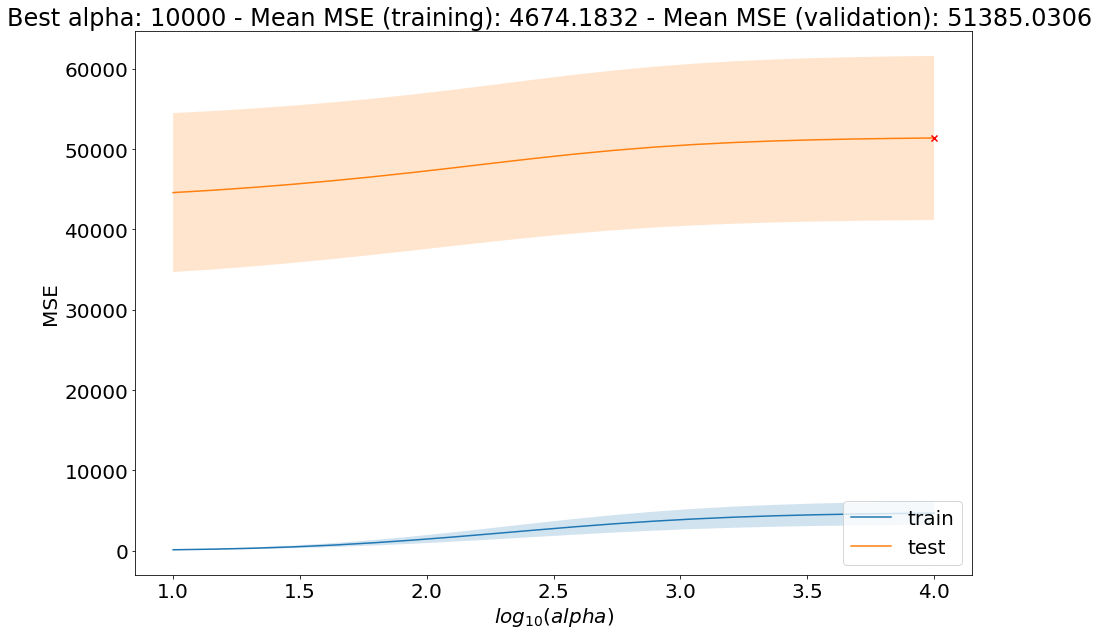

In [16]:
# Fit/test N models
gs_results = []
for i in range(6):
    X_tr = df.drop(['Date'], axis = 1).loc[cv[i][0]]
    X_vl = df.drop(['Date'], axis = 1).loc[cv[i][1]]
    y_tr = df['Total'].loc[cv[i][0]]
    y_vl = df['Total'].loc[cv[i][1]]
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_vl_rescaled = scaler.transform(X_vl)

    # Grid search
    for alpha in np.logspace(1, 4, num=20):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled, y_tr)

        # Save model and its performance on train/test sets
        gs_results.append({
            'alpha': alpha,
            'run_idx': i,
            'train_mse': mean_squared_error(y_tr, ridge.predict(X_tr_rescaled)),
            #'train_mae': mean_absolute_error(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'test_mse': mean_squared_error(y_vl, ridge.predict(X_vl_rescaled)),
            #'test_mae': mean_absolute_error(10**y_vl, 10**ridge.predict(X_vl_rescaled)),    
    
    })
        
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_te = gb_alpha.test_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_te = gb_alpha.test_mse.std()
alphas = mean_tr.index.values

# Plot mean scores
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize']= 15,10

plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with confidence interval curves
t_int = np.abs(t.ppf((1-0.95)/2,len(df)-1))
t_int_tr_up = mean_tr + std_tr * t_int/np.sqrt(len(df))
t_int_tr_low = mean_tr - std_tr * t_int/np.sqrt(len(df))
t_int_te_up = mean_te + std_te * t_int/np.sqrt(len(df))
t_int_te_low = mean_te - std_te * t_int/np.sqrt(len(df))
plt.fill_between(np.log10(alphas), t_int_tr_low, t_int_tr_up, alpha=0.2)
plt.fill_between(np.log10(alphas), t_int_te_low, t_int_te_up, alpha=0.2)
# Add marker for best score
gs_results_filtered = gs_results[gs_results['train_mse']>gs_results['test_mse']].sort_values('test_mse').reset_index()
best_alpha = gs_results_filtered.iloc[0,1]
mean_te_ridge_plot = mean_te.reset_index()
mean_te_plot_ridge = mean_te_ridge_plot[mean_te_ridge_plot['alpha'] == best_alpha].iloc[0,1]

plt.scatter(np.log10(best_alpha), mean_te_plot_ridge, marker='x', c='red', zorder=10)

# Print best MSE/MAE scores
best_result_ridge = gb_alpha.get_group(best_alpha)
plt.title('Best alpha: {:.0f} - Mean MSE (training): {:.4f} - Mean MSE (validation): {:.4f} '.format(
    best_alpha, best_result_ridge.train_mse.mean(), best_result_ridge.test_mse.mean()))

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend(loc = 'lower right',
          prop = {'size': 20})
plt.show()

In [17]:
best_result_ridge.head()

,alpha,run_idx,train_mse,test_mse
19,10000.00,0,18295.83,45935.73
39,10000.00,1,1726.43,349.35
59,10000.00,2,1732.01,134178.52
79,10000.00,3,2569.96,71340.14
99,10000.00,4,1984.08,36360.06


In [18]:
# Fit the model with best alpha
def fit_model_best_n(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = Ridge(alpha=best_result_ridge.alpha.iloc[0]) 
    
    # Fit it to train data
    model.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = np.maximum(
        model.predict(X_test),
        50 # set a lower limit
    )
    
    return y_pred

In [19]:
y_pred_all_best = fit_model_best_n(X_train_valid, y_train_valid, X_test)
mse_best_ridge = mean_squared_error(y_test, y_pred_all_best)

print('MSE: {:.2f}'.format(mse_best_ridge))


MSE: 34590.69


## 3.2. K-nearest neighbours

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neighbors  870 non-null    int64  
 1   leaf_size  870 non-null    int64  
 2   p          870 non-null    int64  
 3   run_idx    870 non-null    int64  
 4   train_mse  870 non-null    float64
 5   test_mse   870 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 40.9 KB
None


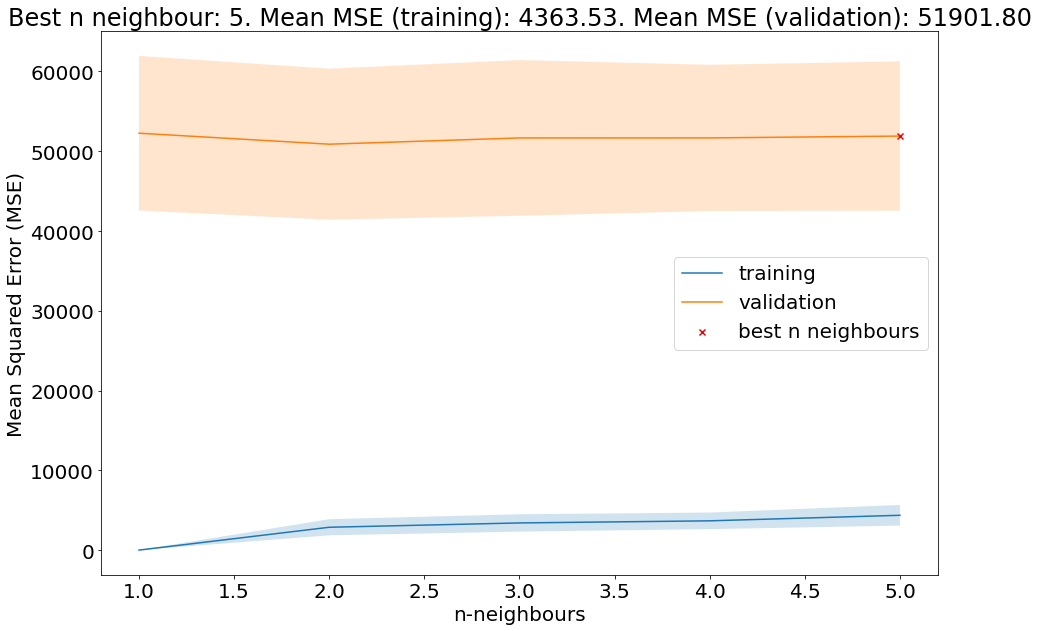

    index  neighbors  leaf_size  p  run_idx  train_mse  test_mse
0     289          5         29  1        1    1419.31    573.17
29    247          4         16  1        1    1533.27    590.40
58    211          3          9  1        1    1033.94    623.25


In [39]:
# Fit/test N models
gs_results_knn = []
for i in range(6):
    X_tr = df.drop(['Date'], axis = 1).loc[cv[i][0]]
    X_vl = df.drop(['Date'], axis = 1).loc[cv[i][1]]
    y_tr = df['Total'].loc[cv[i][0]]
    y_vl = df['Total'].loc[cv[i][1]]
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_vl_rescaled = scaler.transform(X_vl)
    #X_tr_rescaled = X_tr
    #X_vl_rescaled = X_vl

    # Grid search
    for n in list(range(1,6)):
        for l in list(range(1,30)):
            for p in list(range(1,2)):
                knn = KNeighborsRegressor(n_neighbors = n,
                                          leaf_size = l,
                                          p = p)
                knn.fit(X_tr_rescaled, y_tr)

                # Save model and its performance on train/test sets
                gs_results_knn.append({
                    'neighbors': n,
                    'leaf_size': l,
                    'p': p,
                    'run_idx': i,
                    'train_mse': mean_squared_error(y_tr, knn.predict(X_tr_rescaled)),
                    #'train_mae': mean_absolute_error(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
                    'test_mse': mean_squared_error(y_vl, knn.predict(X_vl_rescaled)),
                    #'test_mae': mean_absolute_error(10**y_vl, 10**ridge.predict(X_vl_rescaled)),    
    
    })
        
# Convert results to DataFrame
gs_results_knn = pd.DataFrame(gs_results_knn)
print(gs_results_knn.info())

# Group results by n value
gb_n_knn = gs_results_knn.groupby('neighbors')


# Compute train/test mean scores with std
mean_tr = gb_n_knn.train_mse.mean()
mean_te = gb_n_knn.test_mse.mean()
std_tr = gb_n_knn.train_mse.std()
std_te = gb_n_knn.test_mse.std()
ns = mean_tr.index.values

# Plot mean scores
plt.plot(ns, mean_tr, label='training')
plt.plot(ns, mean_te, label='validation')

# Quantify variance with confidence interval curves
t_int = np.abs(t.ppf((1-0.95)/2,len(df)-1))
t_int_tr_up = mean_tr + std_tr * t_int/np.sqrt(len(df))
t_int_tr_low = mean_tr - std_tr * t_int/np.sqrt(len(df))
t_int_te_up = mean_te + std_te * t_int/np.sqrt(len(df))
t_int_te_low = mean_te - std_te * t_int/np.sqrt(len(df))
plt.fill_between(ns, t_int_tr_low, t_int_tr_up, alpha=0.2)
plt.fill_between(ns, t_int_te_low, t_int_te_up, alpha=0.2)

# Add marker for best score
gs_results_knn_filtered = gs_results_knn[gs_results_knn['train_mse']>gs_results_knn['test_mse']].sort_values('test_mse').reset_index()
best_n = gs_results_knn_filtered.iloc[0,1]
mean_te_plot = mean_te.reset_index()
mean_te_plot = mean_te_plot[mean_te_plot['neighbors'] == best_n].iloc[0,1]
plt.scatter(best_n, mean_te_plot, marker='x', c='red', zorder=10, label = "best n neighbours")

# Print best MSE/MAE scores
best_result_knn = gb_n_knn.get_group(n)
plt.title('Best n neighbour: {:.0f}. Mean MSE (training): {:.2f}. Mean MSE (validation): {:.2f}'.format(
    best_n, best_result_knn.train_mse.mean(), best_result_knn.test_mse.mean()))

plt.xlabel('n-neighbours')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc = 7)
plt.show()

print(gs_results_knn_filtered.drop_duplicates(subset=['neighbors']))

In [22]:
# Fit the model with best n
def fit_model_best_n(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = KNeighborsRegressor(n_neighbors = best_result_knn.neighbors.iloc[0],
                                leaf_size = best_result_knn.leaf_size.iloc[0],
                                p = best_result_knn.p.iloc[0]) 
    
    # Fit it to train data
    model.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = np.maximum(
        model.predict(X_test),
        50 # set a lower limit
    )
    
    return y_pred

In [42]:
#mse_best_train = mean_squared_error(y_tr, model.predict(X_tr_rescaled))
#mse_best_valid = mean_squared_error(y_vl, model.predict(X_vl_rescaled))

In [23]:
y_pred_all_best = fit_model_best_n(X_train_valid, y_train_valid, X_test)
mse_best_test = mean_squared_error(y_test, y_pred_all_best)

print('MSE: {:.2f}'.format(mse_best_test))


MSE: 31075.32


In [37]:
gs_results_knn_filtered

,index,neighbors,leaf_size,p,run_idx,train_mse,test_mse
0,289,5,29,1,1,1419.31,573.17
1,261,5,1,1,1,1419.31,573.17
2,262,5,2,1,1,1419.31,573.17
3,263,5,3,1,1,1419.31,573.17
4,264,5,4,1,1,1419.31,573.17
5,265,5,5,1,1,1419.31,573.17
6,266,5,6,1,1,1419.31,573.17
7,268,5,8,1,1,1419.31,573.17
8,269,5,9,1,1,1419.31,573.17
9,270,5,10,1,1,1419.31,573.17


## 3.2. Select best k features

In [25]:
# Reduction of features based on K best features
X_all = df.drop(['Date'], axis = 1).drop(['Total'], axis = 1)
y_all = df['Total']

print("\33[1m" + "\33[34m" + 
     "\nReduction of features based on k best features" +
     "\33[0m" + "\n")
select_10 = SelectKBest(f_regression, k = 10)
select_10.fit(X_all, y_all)
X_all_10 = select_10.transform(X_all)
print("Shape after selecting best 10 features:", X_all_10.shape) 

select_18 = SelectKBest(f_regression, k = 18)
select_18.fit(X_all, y_all)
X_all_18 = select_18.transform(X_all)
print("Shape after selecting best 15 features:", X_all_18.shape) 

select_30 = SelectKBest(f_regression, k = 30)
select_30.fit(X_all, y_all)
X_all_30 = select_30.transform(X_all)
print("Shape after selecting best 30 features:", X_all_30.shape) 


Reduction of features based on k best features

Shape after selecting best 10 features: (84, 10)
Shape after selecting best 15 features: (84, 18)
Shape after selecting best 30 features: (84, 30)


In [26]:
# Getting selected features
features_10 = list(X_all.columns[select_10.get_support(indices = True)])
print('\33[1m'+'\nBest 10 features: \n' +
      '\33[0m', features_10)

features_18 = list(X_all.columns[select_18.get_support(indices = True)])
print('\33[1m'+'\nBest 18 features: \n' +
      '\33[0m', features_18)

features_30 = list(X_all.columns[select_30.get_support(indices = True)])
print('\33[1m'+'\nBest 30 features: \n' +
      '\33[0m', features_30)


Best 10 features: 
 ['year', 'population_growth_annual_percent', 'population_density_people_per_sq_km_of_land_area', 'life_expectancy_at_birth_total_years', 'adolescent_fertility_rate_births_per_1_000_women_ages_15_19', 'births_attended_by_skilled_health_staff_percent_of_total', 'school_enrollment_primary_percent_gross', 'urban_population_growth_annual_percent', 'people_using_safely_managed_drinking_water_services_percent_of_population', 'hospital_beds_per_1_000_people']

Best 18 features: 
 ['year', 'population_growth_annual_percent', 'population_density_people_per_sq_km_of_land_area', 'poverty_headcount_ratio_at_2_15_a_day_2017_ppp_percent_of_population', 'income_share_held_by_lowest_20_percent', 'life_expectancy_at_birth_total_years', 'fertility_rate_total_births_per_woman', 'adolescent_fertility_rate_births_per_1_000_women_ages_15_19', 'births_attended_by_skilled_health_staff_percent_of_total', 'school_enrollment_primary_percent_gross', 'urban_population_growth_annual_percent', 'g

## 3.3. k-NN with best 10 features

In [27]:
df_10 = df.loc[:,X_all.columns[select_10.get_support(indices = True)]]
df_10.head()

,year,population_growth_annual_percent,population_density_people_per_sq_km_of_land_area,life_expectancy_at_birth_total_years,adolescent_fertility_rate_births_per_1_000_women_ages_15_19,births_attended_by_skilled_health_staff_percent_of_total,school_enrollment_primary_percent_gross,urban_population_growth_annual_percent,people_using_safely_managed_drinking_water_services_percent_of_population,hospital_beds_per_1_000_people
0,2013,0.87,24.13,73.92,63.06,98.00,109.95,1.20,80.41,2.25
1,2013,0.87,24.13,73.92,63.06,98.00,109.95,1.20,80.41,2.25
2,2013,0.87,24.13,73.92,63.06,98.00,109.95,1.20,80.41,2.25
3,2013,0.87,24.13,73.92,63.06,98.00,109.95,1.20,80.41,2.25
4,2013,0.87,24.13,73.92,63.06,98.00,109.95,1.20,80.41,2.25


In [28]:
# Fit/test N models
gs_results_knn_10 = []
for i in range(6):
    X_tr_10 = df_10.loc[cv[i][0]]
    X_vl_10 = df_10.loc[cv[i][1]]
    y_tr_10 = df['Total'].loc[cv[i][0]]
    y_vl_10 = df['Total'].loc[cv[i][1]]
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled_10 = scaler.fit_transform(X_tr_10)
    X_vl_rescaled_10 = scaler.transform(X_vl_10)

    # Grid search
    for n in list(range(1,6)):
        for l in list(range(1,30)):
            for p in list(range(1,2)):
                knn_10 = KNeighborsRegressor(n_neighbors = n,
                                          leaf_size = l,
                                          p = p)
                knn_10.fit(X_tr_rescaled_10, y_tr_10)

                # Save model and its performance on train/test sets
                gs_results_knn_10.append({
                    'neighbors': n,
                    'leaf_size': l,
                    'p': p,
                    'run_idx': i,
                    'train_mse': mean_squared_error(y_tr_10, knn_10.predict(X_tr_rescaled_10)),
                    #'train_mae': mean_absolute_error(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
                    'test_mse': mean_squared_error(y_vl_10, knn_10.predict(X_vl_rescaled_10)),
                    #'test_mae': mean_absolute_error(10**y_vl, 10**ridge.predict(X_vl_rescaled)),    
    
    })
        
# Convert results to DataFrame
gs_results_knn_10 = pd.DataFrame(gs_results_knn_10)
print(gs_results_knn_10.info())

# Group results by n value
gb_n_knn_10 = gs_results_knn_10.groupby('neighbors')


# Compute train/test mean scores with std
mean_tr_10 = gb_n_knn_10.train_mse.mean()
mean_te_10 = gb_n_knn_10.test_mse.mean()
std_tr_10 = gb_n_knn_10.train_mse.std()
std_te_10 = gb_n_knn_10.test_mse.std()
ns_10 = mean_tr_10.index.values




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neighbors  870 non-null    int64  
 1   leaf_size  870 non-null    int64  
 2   p          870 non-null    int64  
 3   run_idx    870 non-null    int64  
 4   train_mse  870 non-null    float64
 5   test_mse   870 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 40.9 KB
None


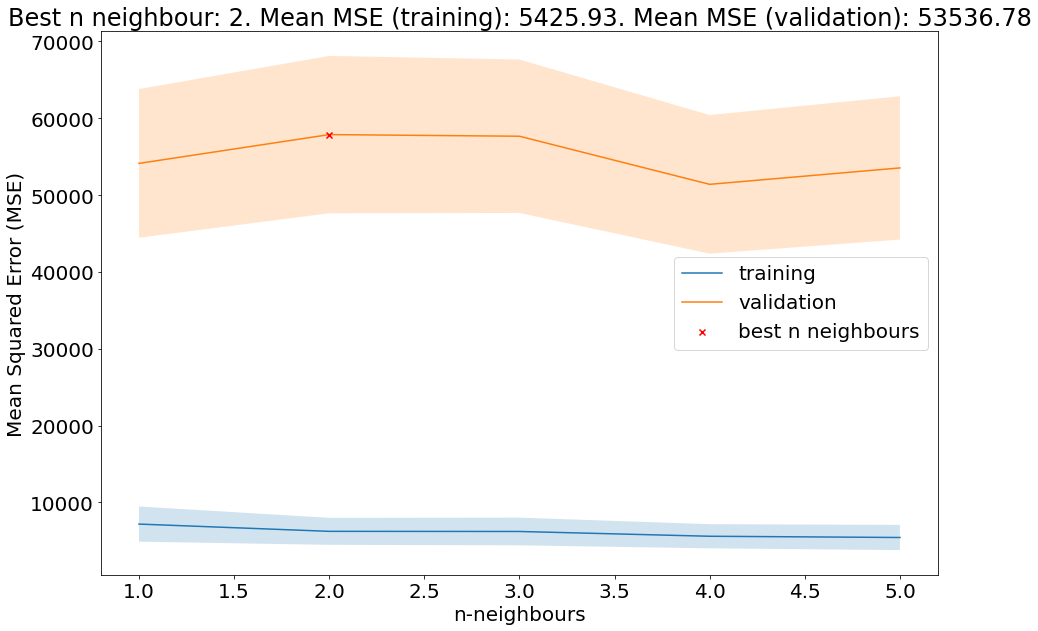

     index  neighbors  leaf_size  p  run_idx  train_mse  test_mse
0      199          2         26  1        1    1851.35    290.82
27     206          3          4  1        1    1975.31    337.13
56     149          1          5  1        1    1763.22    367.48
84     271          5         11  1        1    1914.58    684.65
114    256          4         25  1        1    2184.73   1078.64


In [29]:
# Plot mean scores
plt.plot(ns_10, mean_tr_10, label='training')
plt.plot(ns, mean_te_10, label='validation')

# Quantify variance with confidence interval curves
t_int = np.abs(t.ppf((1-0.95)/2,len(df_10)-1))
t_int_tr_up = mean_tr_10 + std_tr_10 * t_int/np.sqrt(len(df_10))
t_int_tr_low = mean_tr_10 - std_tr_10 * t_int/np.sqrt(len(df_10))
t_int_te_up = mean_te_10 + std_te_10 * t_int/np.sqrt(len(df_10))
t_int_te_low = mean_te_10 - std_te_10 * t_int/np.sqrt(len(df_10))
plt.fill_between(ns_10, t_int_tr_low, t_int_tr_up, alpha=0.2)
plt.fill_between(ns, t_int_te_low, t_int_te_up, alpha=0.2)

# Add marker for best score
gs_results_knn_filtered_10 = gs_results_knn_10[gs_results_knn_10['train_mse']>gs_results_knn_10['test_mse']].sort_values('test_mse').reset_index()
best_n_10 = gs_results_knn_filtered_10.iloc[0,1]
mean_te_plot_10 = mean_te_10.reset_index()
mean_te_plot_10 = mean_te_plot_10[mean_te_plot_10['neighbors'] == best_n_10].iloc[0,1]
plt.scatter(best_n_10, mean_te_plot_10, marker='x', c='red', zorder=10, label = "best n neighbours")

# Print best MSE/MAE scores
best_result_knn_10 = gb_n_knn_10.get_group(n)
plt.title('Best n neighbour: {:.0f}. Mean MSE (training): {:.2f}. Mean MSE (validation): {:.2f}'.format(
    best_n_10, best_result_knn_10.train_mse.mean(), best_result_knn_10.test_mse.mean()))

plt.xlabel('n-neighbours')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc = 7)
plt.show()

print(gs_results_knn_filtered_10.drop_duplicates(subset=['neighbors']))

## 3.4. Feature importance

In [30]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance

In [31]:
# Calculate features' importance
model = KNeighborsRegressor(n_neighbors = best_result_knn.neighbors.iloc[0],
                                leaf_size = best_result_knn.leaf_size.iloc[0],
                                p = best_result_knn.p.iloc[0]) 

model.fit(X_train_valid, y_train_valid)

permutation_results = permutation_importance(model, X_train_valid, y_train_valid, scoring = 'neg_mean_squared_error')
importance = permutation_results.importances_mean

In [32]:
# Calculate 95% CI of t-distribution for features' importance
ci = np.abs(t.ppf((1-0.95)/2,len(permutation_results.importances)-1))
m = permutation_results.importances_mean
s = permutation_results.importances_std
ci_lower = m-s*ci/np.sqrt(len(permutation_results.importances))
ci_upper = m+s*ci/np.sqrt(len(permutation_results.importances)) 

# Features' importance in dataframe
importance = pd.DataFrame({
    'Feature': df.iloc[:, 0:96].columns,
    'Importance (mean)': permutation_results.importances_mean,
    'Importance (sd)': permutation_results.importances_std,
    'Importance (95% CI - lower)': np.round(ci_lower, 2),
    'Importance (95% CI - upper)': np.round(ci_upper,2)
})

importance['Importance (95% CI)'] = "(" + importance['Importance (95% CI - lower)'].astype(str) + " - " + importance['Importance (95% CI - upper)'].astype(str) + ")"

importance_filtered = importance[importance['Importance (mean)'] != 0].sort_values(by = ["Importance (mean)"], ascending = False).reset_index().iloc[:,np.r_[1:4, 6]]
importance_filtered

,Feature,Importance (mean),Importance (sd),Importance (95% CI)
0,user_statuses_mean,6417.86,1673.90,(6078.7 - 6757.03)
1,total_BR,2570.92,1000.41,(2368.22 - 2773.62)
2,total_BRG1673,1076.44,523.03,(970.46 - 1182.41)
3,total_BRG1668,1057.46,529.05,(950.26 - 1164.65)
4,following_mean,1046.90,509.86,(943.59 - 1150.2)
5,total_BRG1671,1038.61,525.93,(932.05 - 1145.17)
6,entities_count,1033.67,504.80,(931.39 - 1135.95)
7,total_BRG1681,1029.71,516.07,(925.15 - 1134.28)
8,verified_users_count,1011.43,507.36,(908.63 - 1114.23)
9,retweets_count,1004.49,439.69,(915.4 - 1093.58)


In [33]:
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()